In [1]:
import sys
import pandas as pd
print(pd.__version__)


2.2.3


In [8]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the accelerometer CSV file
# Replace this with the actual path to your Conflab accelerometer data file
file_path = "/Users/lukini/Desktop/1.csv"

df = pd.read_csv(file_path)

Index(['time', 'accelX', 'accelY', 'accelZ', 'gyrX', 'gyrY', 'gyrZ', 'magX',
       'magY', 'magZ', 'rotA', 'rotB', 'rotC', 'rotD', 'rssi'],
      dtype='object')
   time    accelX    accelY    accelZ      gyrX      gyrY      gyrZ      magX  \
0  0.00  0.097168 -0.936035  0.341797 -0.093460  4.758835  1.167297 -8.850006   
1  0.02  0.096243 -0.943179  0.360274  0.298450  2.418618  0.963311 -9.094746   
2  0.04  0.088328 -0.940558  0.349789 -1.012200  4.580548  0.038147 -8.163165   
3  0.06  0.087428 -0.946263  0.346705 -2.125288  2.940630 -0.000402 -8.771064   
4  0.08  0.086225 -0.955509  0.343894 -2.346375  3.509409 -0.356786 -9.361772   

        magY       magZ      rotA      rotB      rotC      rotD  rssi  
0  68.099991  20.249985  0.819246 -0.570056 -0.014040 -0.014040 -86.0  
1  68.344731  20.249985  0.819336 -0.569927 -0.013469 -0.013469 -79.0  
2  67.476306  20.423670  0.819252 -0.570040 -0.012890 -0.012890 -76.5  
3  68.526305  21.710521  0.819053 -0.570308 -0.012494 -0.01249

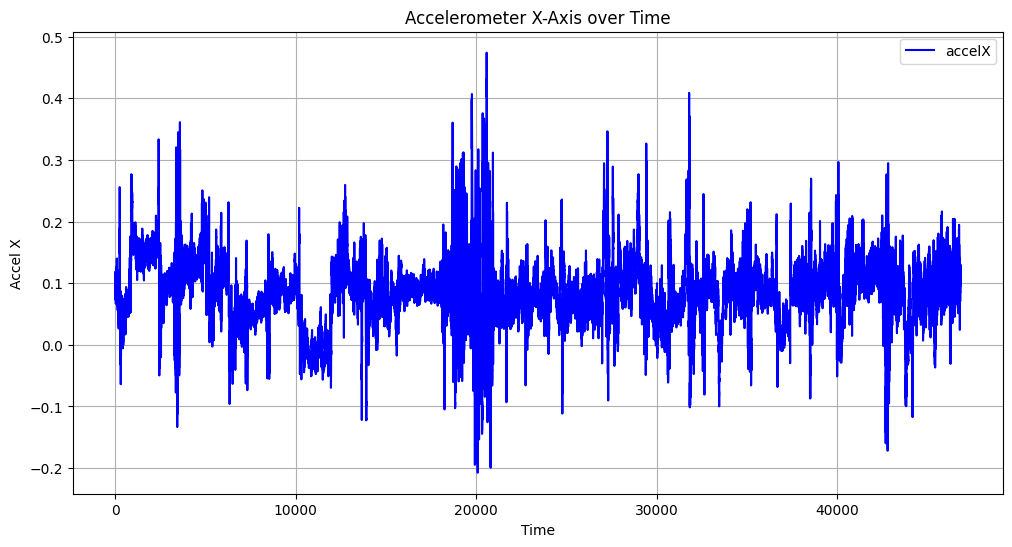

In [9]:
# Step 3: Display the first few rows to understand the structure
print(df.columns)
print(df.head())

# Step 4: Plot accelX over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['accelX'], label='accelX', color='blue')

plt.title('Accelerometer X-Axis over Time')
plt.xlabel('Time')
plt.ylabel('Accel X')
plt.legend()
plt.grid(True)
plt.show()


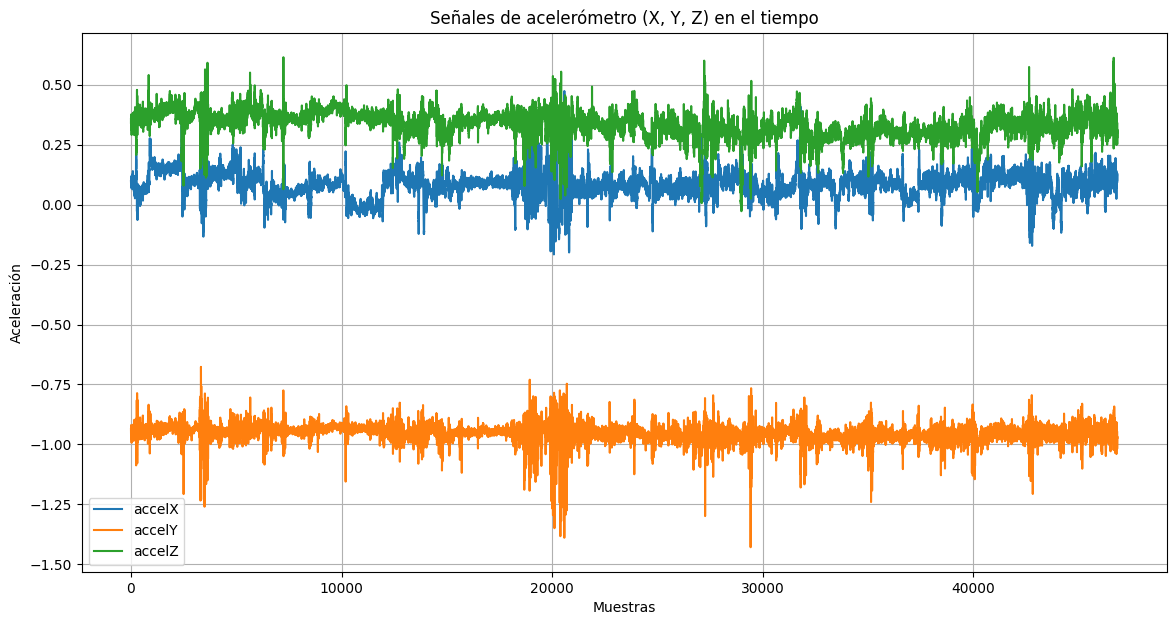

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['accelX'], label='accelX')
plt.plot(df.index, df['accelY'], label='accelY')
plt.plot(df.index, df['accelZ'], label='accelZ')

plt.title('Señales de acelerómetro (X, Y, Z) en el tiempo')
plt.xlabel('Muestras')
plt.ylabel('Aceleración')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Estadísticas básicas
print(df[['accelX', 'accelY', 'accelZ']].describe())


             accelX        accelY        accelZ
count  46850.000000  46850.000000  46850.000000
mean       0.085148     -0.952648      0.333627
std        0.054842      0.032497      0.051855
min       -0.207628     -1.428797     -0.027317
25%        0.057217     -0.966634      0.303548
50%        0.086914     -0.951335      0.338460
75%        0.114855     -0.936605      0.366699
max        0.473877     -0.676514      0.614909


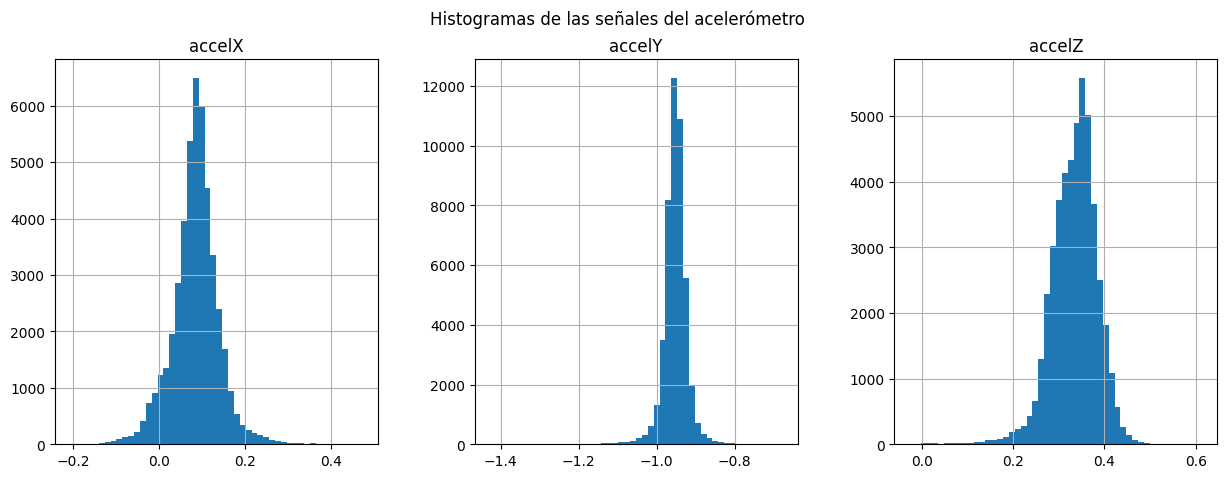

In [14]:
df[['accelX', 'accelY', 'accelZ']].hist(bins=50, figsize=(15,5), layout=(1,3))
plt.suptitle('Histogramas de las señales del acelerómetro')
plt.show()


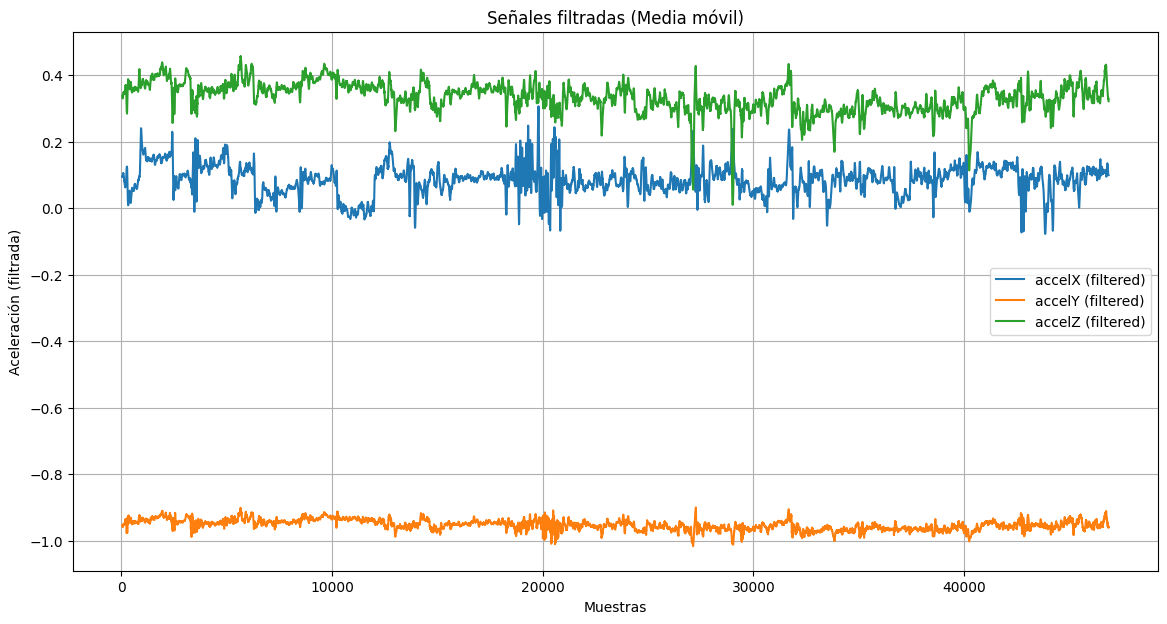

In [15]:
# Media móvil simple (ventana de 50 muestras)
window_size = 50
df_filtered = df[['accelX', 'accelY', 'accelZ']].rolling(window=window_size).mean()

# Visualización de las señales filtradas
plt.figure(figsize=(14, 7))
plt.plot(df_filtered.index, df_filtered['accelX'], label='accelX (filtered)')
plt.plot(df_filtered.index, df_filtered['accelY'], label='accelY (filtered)')
plt.plot(df_filtered.index, df_filtered['accelZ'], label='accelZ (filtered)')

plt.title('Señales filtradas (Media móvil)')
plt.xlabel('Muestras')
plt.ylabel('Aceleración (filtrada)')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import numpy as np

window_size = 100  # muestras por ventana
overlap = 50       # solapamiento entre ventanas

# función para segmentar la señal
def segment_signal(signal, window_size, overlap):
    segments = []
    for start in range(0, len(signal) - window_size + 1, window_size - overlap):
        segment = signal[start:start + window_size]
        segments.append(segment)
    return np.array(segments)

# Ejemplo segmentando accelX
segments_x = segment_signal(df['accelX'].values, window_size, overlap)
print(f'Número de ventanas generadas: {segments_x.shape[0]}')
print(f'Tamaño de cada ventana: {segments_x.shape[1]}')


Número de ventanas generadas: 936
Tamaño de cada ventana: 100


In [18]:
from scipy.stats import skew, kurtosis

def extract_features(segment):
    features = {
        'mean': np.mean(segment),
        'std': np.std(segment),
        'var': np.var(segment),
        'energy': np.sum(segment**2),
        'zcr': ((segment[:-1] * segment[1:]) < 0).sum(),
        'skewness': skew(segment),
        'kurtosis': kurtosis(segment)
    }
    return features

# Ejemplo con una sola ventana
example_features = extract_features(segments_x[0])
print(example_features)


{'mean': np.float64(0.0992426072505482), 'std': np.float64(0.014340955422587214), 'var': np.float64(0.0002056630024326336), 'energy': np.float64(1.0054758096319196), 'zcr': np.int64(0), 'skewness': np.float64(-0.0720532353379163), 'kurtosis': np.float64(-0.2601419354697252)}


In [19]:
import numpy as np
import pandas as pd

# Definir tamaños de ventana y solapamientos a probar
window_sizes = [50, 100, 200]
overlap_percentages = [0, 0.25, 0.50, 0.75]

# Función para segmentar señal
def segment_signal(signal, window_size, overlap):
    step = int(window_size * (1 - overlap))
    segments = []
    for start in range(0, len(signal) - window_size + 1, step):
        segment = signal[start:start + window_size]
        segments.append(segment)
    return np.array(segments)

# Realizar segmentación múltiple y obtener información estadística
results = []

for window_size in window_sizes:
    for overlap in overlap_percentages:
        segments = segment_signal(df['accelX'].values, window_size, overlap)
        num_segments = segments.shape[0]

        # Calcular características estadísticas simples para cada ventana
        means = np.mean(segments, axis=1)
        stds = np.std(segments, axis=1)

        # Almacenar resultados en DataFrame
        df_stats = pd.DataFrame({
            'window_size': window_size,
            'overlap': overlap,
            'num_segments': num_segments,
            'mean_of_means': means.mean(),
            'mean_of_stds': stds.mean(),
            'std_of_means': means.std(),
            'std_of_stds': stds.std()
        }, index=[0])

        results.append(df_stats)

# Mostrar resultados combinados
df_results = pd.concat(results, ignore_index=True)
print(df_results)


    window_size  overlap  num_segments  mean_of_means  mean_of_stds  \
0            50     0.00           937       0.085148      0.023395   
1            50     0.25          1265       0.085031      0.023134   
2            50     0.50          1873       0.085141      0.023076   
3            50     0.75          3901       0.085134      0.023103   
4           100     0.00           468       0.085133      0.028469   
5           100     0.25           624       0.085035      0.028275   
6           100     0.50           936       0.085136      0.028425   
7           100     0.75          1871       0.085124      0.028325   
8           200     0.00           234       0.085133      0.032752   
9           200     0.25           312       0.085265      0.032509   
10          200     0.50           467       0.085086      0.032536   
11          200     0.75           934       0.085092      0.032573   

    std_of_means  std_of_stds  
0       0.044124     0.022656  
1       0.04

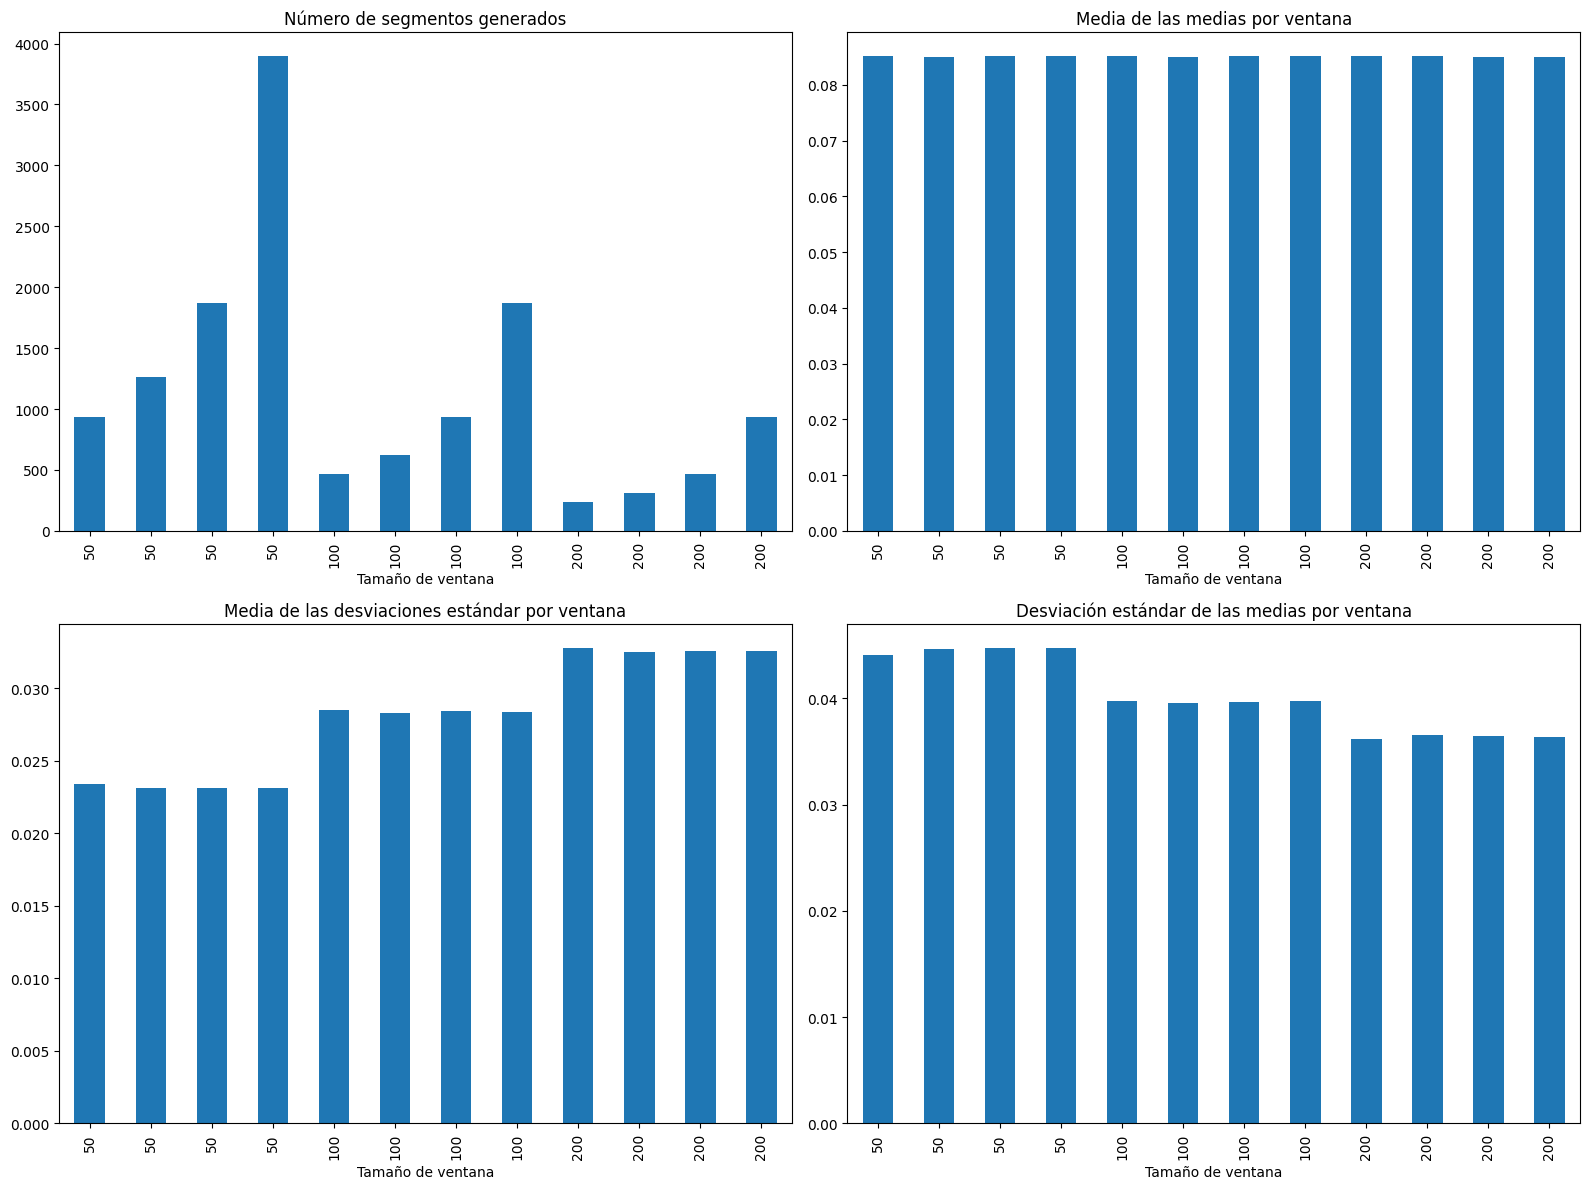

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Gráficos para analizar cómo varían las métricas según los parámetros
df_results.plot(x='window_size', y='num_segments', kind='bar', ax=axs[0,0], legend=False)
axs[0,0].set_title('Número de segmentos generados')
axs[0,0].set_xlabel('Tamaño de ventana')

df_results.plot(x='window_size', y='mean_of_means', kind='bar', ax=axs[0,1], legend=False)
axs[0,1].set_title('Media de las medias por ventana')
axs[0,1].set_xlabel('Tamaño de ventana')

df_results.plot(x='window_size', y='mean_of_stds', kind='bar', ax=axs[1,0], legend=False)
axs[1,0].set_title('Media de las desviaciones estándar por ventana')
axs[1,0].set_xlabel('Tamaño de ventana')

df_results.plot(x='window_size', y='std_of_means', kind='bar', ax=axs[1,1], legend=False)
axs[1,1].set_title('Desviación estándar de las medias por ventana')
axs[1,1].set_xlabel('Tamaño de ventana')

plt.tight_layout()
plt.show()


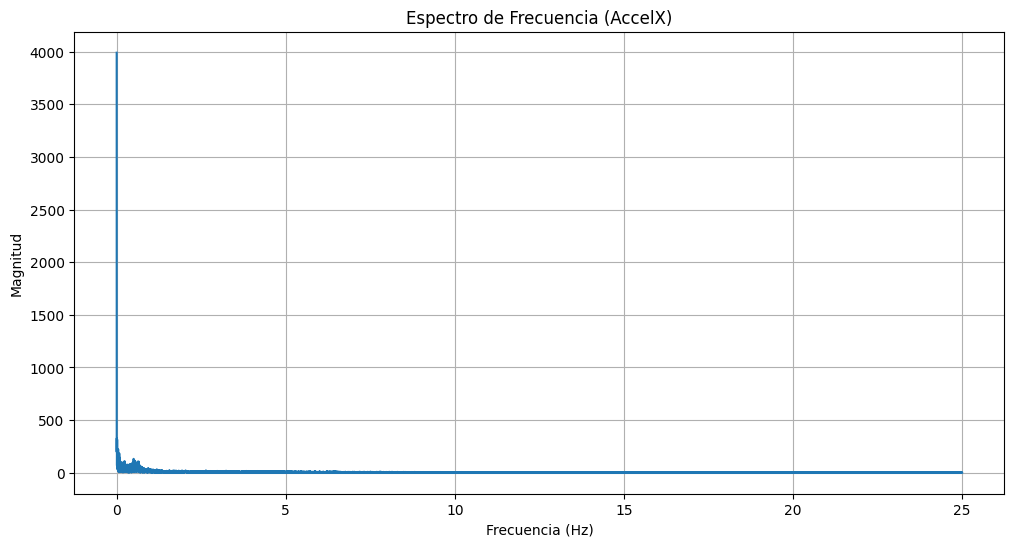

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Señal original (accelX)
signal_x = df['accelX'].values
n = len(signal_x)
fs = 50  # Supongamos frecuencia de muestreo de 50Hz

# Frecuencias para la DFT
freq = np.fft.rfftfreq(n, d=1/fs)

# DFT
dft_signal_x = np.abs(np.fft.rfft(signal_x))

# Gráfica del espectro de frecuencias
plt.figure(figsize=(12,6))
plt.plot(freq, dft_signal_x)
plt.title("Espectro de Frecuencia (AccelX)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()


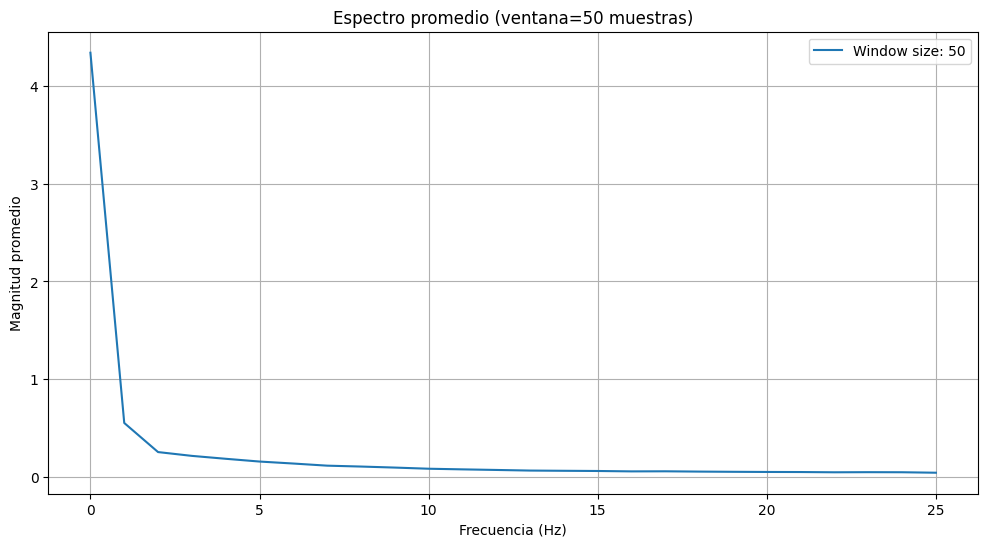

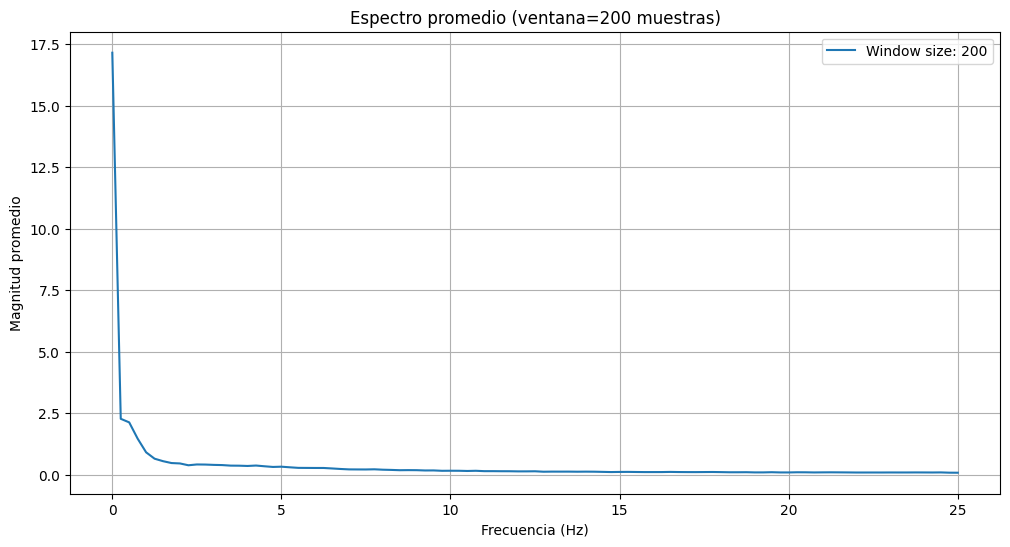

In [22]:
window_sizes = [50, 200]

for window_size in window_sizes:
    segments = [signal_x[i:i+window_size] for i in range(0, len(signal_x)-window_size, window_size)]

    avg_dft = np.zeros(window_size//2 + 1)

    for segment in segments:
        dft_seg = np.abs(np.fft.rfft(segment))
        avg_dft += dft_seg

    avg_dft /= len(segments)
    freq_segment = np.fft.rfftfreq(window_size, d=1/fs)

    plt.figure(figsize=(12,6))
    plt.plot(freq_segment, avg_dft, label=f'Window size: {window_size}')
    plt.title(f"Espectro promedio (ventana={window_size} muestras)")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud promedio")
    plt.grid(True)
    plt.legend()
    plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Parámetros del Sliding Window
window_size = 100
overlap = 0.5

step = int(window_size*(1-overlap))

# Generar segmentos
segments = []
labels = []

# Ejemplo artificial: clasificamos arbitrariamente primeros segmentos como clase 0 y siguientes como clase 1 (ejemplo demo)
# En la práctica, las etiquetas vendrán del ground truth del dataset (ej. risas o no risas)
for start in range(0, len(signal_x)-window_size, step):
    seg_x = signal_x[start:start+window_size]
    segments.append(seg_x)

# Creamos etiquetas artificiales (mitad 0, mitad 1)
num_segments = len(segments)
labels = [0 if i < num_segments/2 else 1 for i in range(num_segments)]

# Extracción de características (dominio tiempo + frecuencia)
def extract_features(segment):
    dft = np.abs(np.fft.rfft(segment))
    features = [
        np.mean(segment),
        np.std(segment),
        np.var(segment),
        np.sum(segment**2),          # Energía
        ((segment[:-1]*segment[1:])<0).sum(), # ZCR
        np.mean(dft),                # media DFT
        np.std(dft),                 # std DFT
        np.argmax(dft)               # frecuencia predominante
    ]
    return features

X = [extract_features(seg) for seg in segments]
y = labels

# División Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar clasificador RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicción
y_pred = clf.predict(X_test)

# Evaluar clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.62      0.63       143
           1       0.62      0.64      0.63       138

    accuracy                           0.63       281
   macro avg       0.63      0.63      0.63       281
weighted avg       0.63      0.63      0.63       281

